# P4C2 - Augmentez la robustesse de vos modèles

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P4C2_robustesse_modele.ipynb)

Dans ce notebook, nous allons rendre les modèles plus robustes gràce à 2 techniques

- la régularisation
- la validation croisée

Nous travaillons sur le dataset des arbres de Paris

Vous trouverez les versions suivantes du datasets

- sur le site [opendata de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information)
- version [brute](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-2023-09-07.csv) extraite le 10-09-2023, le séparateur est ';'
- version [exploitable](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-clean-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','
- version [numérisée](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','

Ici nous travaillons sur cette version _numérisée_


# Compensez l'overfit avec la régularisation 

Pour montrer la regularisation avec Ridge il faudrait

- creer un dataset lineaire y = ax + bx^2 ou x est N(0,std) et  std est faible
- le modele qui overfit est ridge sans regularisation avec x, x^2, ... x^N. see from sklearn.preprocessing import PolynomialFeatures 
- puis demo, ajout regularisation permet de compenser l'overfit

voir

- https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [2]:
random_state = 3
X, y = make_regression(n_samples=30, n_features=1, noise=40, random_state=random_state)
input = np.linspace(np.min(X), np.max(X), 100)


## Simple régression linéaire



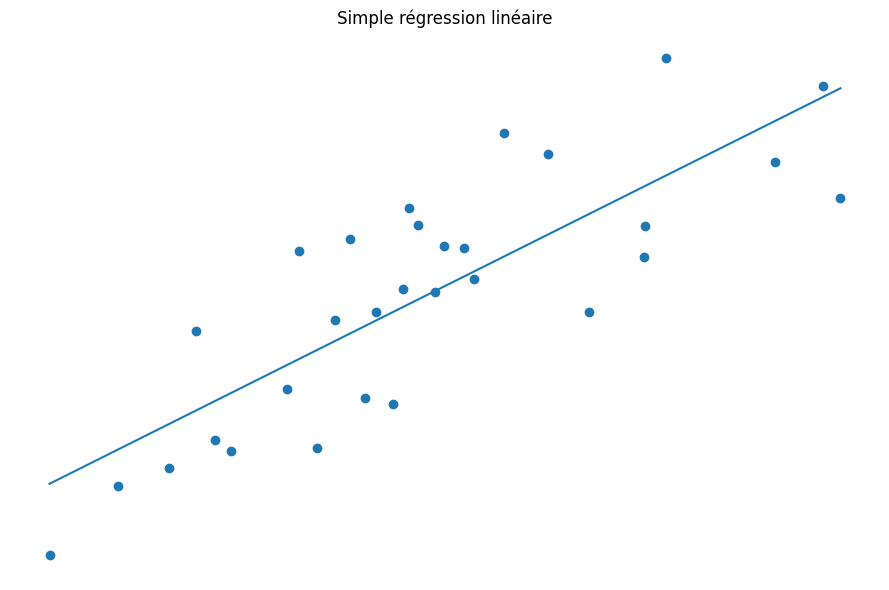

In [3]:
fig = plt.figure( figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], y, label=f"Données source")
model = Ridge(alpha=0)
model.fit(X, y)

y_pred = model.predict(input.reshape(-1, 1))
ax.plot(input, y_pred, label=f"Simple régression linéaire")

ax.set_axis_off()
ax.set_title("Simple régression linéaire")
plt.tight_layout()
plt.show()


## Régression polynomiale de degré 12

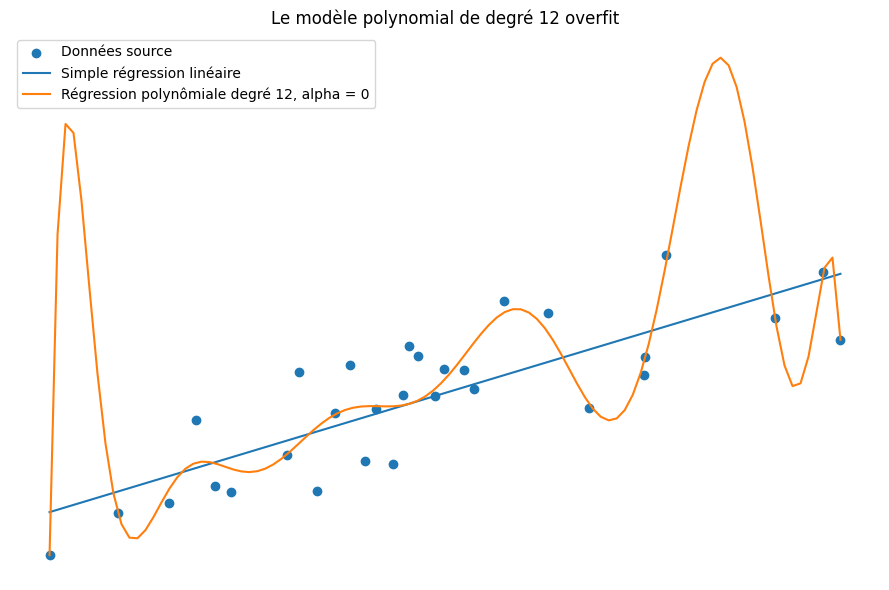

In [4]:
        fig = plt.figure( figsize=(9, 6))
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(X[:,0], y, label=f"Données source")
        model = Ridge(alpha=0)
        model.fit(X, y)

        y_pred = model.predict(input.reshape(-1, 1))
        ax.plot(input, y_pred, label=f"Simple régression linéaire")

        pol = PolynomialFeatures(12, include_bias = False)
        XX = pol.fit_transform(X)
        px = pol.transform(input.reshape(-1, 1))

        # sans regularisation
        model = Ridge(alpha=0)
        model.fit(XX, y)

        y_pred = model.predict(px)
        ax.plot(input, y_pred, label=f"Régression polynômiale degré 12, alpha = 0")

        ax.set_axis_off()
        ax.legend()
        ax.set_title("Le modèle polynomial de degré 12 overfit")
        plt.tight_layout()
        plt.show()
